<a href="https://colab.research.google.com/github/you9222/Digital_Finance/blob/main/Pandas_Data_Analysis_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas Data Analysis Basics**


# ▶  pandas Series

파이썬 기본 자료구조 : 리스트, 튜플, 딕셔너리

In [ ]:
BigTechStock = ['kakao', 'naver']  # 리스트 사용 기초 예제
print(BigTechStock[0])
print(BigTechStock[1])

kakao
naver


In [ ]:
for stock in BigTechStock : # 리스트 for 활용  insert, append, index 등 활용
  print(stock)

kakao
naver


`// 튜플 () 사용 수정이 불가능하지만 리스트에 비해 빠름`



In [ ]:
exam_dic = {'key1' : 'room1', 'key2' : 'room2'}  # 딕셔너리 key - Value 관계로 쌓으로 저장,
print(exam_dic['key1'])                          # 키로 바로 데이터 찾을 수 있음
print(exam_dic['key2'])

room1
room2


In [ ]:
kakao_daily_closing_prices = {'2021-02-19' : 92600,       # 카카오 5일 종가 데이터 - 딕셔너리
                              '2021-02-18' : 92400,
                              '2021-02-17' : 92100,
                              '2021-02-16' : 94300,
                              '2021-02-15' : 92300,}
print(kakao_daily_closing_prices['2021-02-19'])

92600


**series 기초**

series는 리스트와 딕셔너리를 닮음.

In [ ]:
from pandas import Series, DataFrame    # Series : Class 이며, 생성자로 리스트를 넘겨주면 객체를 생성함

kakao = Series([92600, 92400, 92100, 94300, 92300])

print(kakao)

print(kakao[0])

0    92600
1    92400
2    92100
3    94300
4    92300
dtype: int64
92600


In [ ]:
kakao_2 = Series([92600, 92400, 92100, 94300, 92300], 
                 index =['2021-02-19',
                          '2021-02-18',
                          '2021-02-17',
                          '2021-02-16',
                          '2021-02-15'])     # Series 날짜 데이터와 같이 저장
print(kakao_2)

2021-02-19    92600
2021-02-18    92400
2021-02-17    92100
2021-02-16    94300
2021-02-15    92300
dtype: int64


In [ ]:
#  index 랑 values 각각 출력
#  그 외, Series 는 순서가 달라도 같은 index면 알아서 합쳐줌
for k_index in kakao_2.index :
  print(k_index)

for k_values in kakao_2.values : 
  print(k_values)

2021-02-19
2021-02-18
2021-02-17
2021-02-16
2021-02-15
92600
92400
92100
94300
92300


# ▶  pandas DataFrame

In [ ]:
# DataFrame 생성

from pandas import Series, DataFrame  

OHLC_EX = {'open' : [11650, 11100, 11200, 11100, 11000],
           'low'  : [11600, 11050, 10900, 10950, 10900],
           'high' : [12100, 11800, 11200, 11100, 11150],
           'close': [11900, 11600, 11000, 11100, 11050]}

# 시가, 고가, 저가, 종가 : OHLC 라고 함

date = ['21.02.15', '21.02.16', '21.02.17', '21.02.18', '21.02.19'] # index 날짜로 지정
data = DataFrame(OHLC_EX, columns=['open', 'high', 'low', 'close'], index=date) # columns 순서 지정
print(data)

           open   high    low  close
21.02.15  11650  12100  11600  11900
21.02.16  11100  11800  11050  11600
21.02.17  11200  11200  10900  11000
21.02.18  11100  11100  10950  11100
21.02.19  11000  11150  10900  11050


In [ ]:
close = data['close'] # 종가 데이터만 가져오기
print(close)

21.02.15    11900
21.02.16    11600
21.02.17    11000
21.02.18    11100
21.02.19    11050
Name: close, dtype: int64


In [ ]:
day_data = data.loc['21.02.19'] # 21.02.19 데이터만 가져오기 / .loc 메서드 써야함 .ix에서 바뀜
print(day_data)
print(type(day_data)) # 반한된 객체는 Series 타입
print(data.columns) # coulums 값 확인
print(data.index) # index 값 확인

open     11000
high     11150
low      10900
close    11050
Name: 21.02.19, dtype: int64
<class 'pandas.core.series.Series'>
Index(['open', 'high', 'low', 'close'], dtype='object')
Index(['21.02.15', '21.02.16', '21.02.17', '21.02.18', '21.02.19'], dtype='object')


# ▶  Load Stock Data

"일봉"만 pandas에서 야후, 구글로 불러 올 수 있음
DataReader Site
https://pandas-datareader.readthedocs.io/en/latest/readers/nasdaq-trader.html


In [4]:
import pandas_datareader.data as web      # web상에 데이터를 DataFrame 객체로 저장
import datetime     # 날짜를 편리하게 표한하는 모듈 / 2,3 같은건 02, 03으로 표시 X 

start = datetime.datetime(2021, 1, 4)
end = datetime.datetime(2021, 2, 19)


Samsung = web.DataReader('005930.KS', 'yahoo', start, end)    # KOSPI '종목코드.KS'

CCL = web.DataReader('CCL', 'yahoo', start, end)              # NASDAQ 'TICKER'

print(Samsung.tail())  # Adj Close == 조정 종가 :  유상/무상증자, 액면분할 등을 고려한 가격
# Samsung
CCL.tail(3)  # 데이터 너무 많으니 .tail()로 뒤 3개 / 기본 5개


             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2021-02-15  84500  83300  83800  84200  23529706      84200
2021-02-16  86000  84200  84500  84900  20483100      84900
2021-02-17  84200  83000  83900  83200  18307735      83200
2021-02-18  83600  82100  83200  82100  21327683      82100
2021-02-19  82800  81000  82300  82600  25880879      82600


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-17,24.059999,21.879999,22.280001,23.200001,59742500,23.200001
2021-02-18,23.150000,22.379999,22.969999,22.889999,26606400,22.889999
2021-02-19,24.719999,23.480000,23.620001,24.590000,52483300,24.590000


**오늘 날짜 데이터 가져오기.**

**YTD 직접 만들어보기. ( Year To Date ) 21.01.01 ~ today**

여러 방법 있음. 그 중 내가 편한거 / 나중에 함수로 만들어서 사용


In [5]:
import datetime    # 오늘 날짜 가져오기.

today_day = datetime.datetime.now()       # nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')

This_year = today_day.strftime('%Y')                   # 연도만 가져오기

YTD_start = datetime.datetime(int(This_year), 1, 1)    # year는 불러오기 This_year : String -> int 변환 / C의 atoi

YTD_end = today_day.strftime('%Y-%m-%d')               # 오늘 날짜

WFC = web.DataReader('WFC', 'yahoo', YTD_start, YTD_end)    

print(YTD_start)
print(YTD_end)

print(WFC)        # WFC - wells fargo YTD

2021-01-01 00:00:00
2021-04-05
                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2021-01-04  30.440001  29.400000  30.320000  29.700001  31421600.0  29.606310
2021-01-05  30.950001  29.820000  30.090000  30.530001  37360000.0  30.433691
2021-01-06  33.000000  31.790001  31.900000  32.689999  73507500.0  32.586876
2021-01-07  34.200001  33.320000  33.580002  33.430000  50634100.0  33.324543
2021-01-08  33.650002  32.669998  33.610001  33.189999  32324700.0  33.085297
...               ...        ...        ...        ...         ...        ...
2021-03-26  40.230000  39.169998  39.900002  39.759998  29150200.0  39.759998
2021-03-29  39.349998  37.900002  38.580002  38.439999  38426900.0  38.439999
2021-03-30  40.080002  38.470001  38.540001  39.389999  36134200.0  39.389999
2021-03-31  39.630001  38.919998  39.270000  39.070000  25832800.0  39.070000
2021-04-01  39.650002  38.919998 

**차트 그리기**

In [6]:
# Samsung.info()    # DataFrame 객체에서 info 메서드 호출하면 DataFrame 객체를 요약해서 볼 수 있음.
                  # 그래프를 그리기에 5개의 엔트리는 적음

Samsung_ALL = web.DataReader('005930.KS', 'yahoo')    # 전체 데이터 가져오기 2010.01.01 부터
XOM_MA = web.DataReader('XOM', 'yahoo', '2019-01-01', '2021-03-31')   # 나중에 MA 쓰려고 만듬

Samsung_ALL.info()  # 1221개

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1220 entries, 2016-04-06 to 2021-04-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1220 non-null   float64
 1   Low        1220 non-null   float64
 2   Open       1220 non-null   float64
 3   Close      1220 non-null   float64
 4   Volume     1220 non-null   float64
 5   Adj Close  1220 non-null   float64
dtypes: float64(6)
memory usage: 66.7 KB


**matplotlib - pyplot 사용**

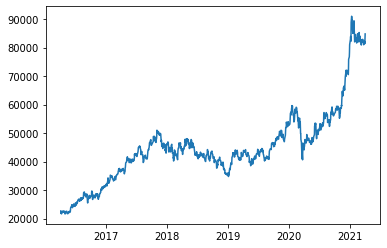

In [ ]:
import matplotlib.pyplot as plt            # 2016-04-04 to 2021-04-02

plt.plot(Samsung_ALL['Adj Close'])

WFC - YTD 

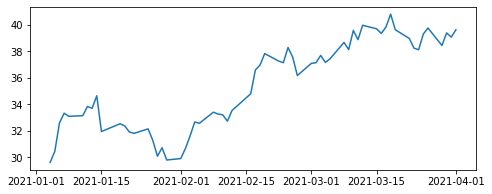

In [21]:
  plt.rcParams['figure.figsize'] = [8, 3]
  plt.plot(WFC['Adj Close'])    ####### https://pyvisuall.tistory.com/62?category=940899 그래프 관련 기능들 블로그

WFC - YTD ( 거래량 )

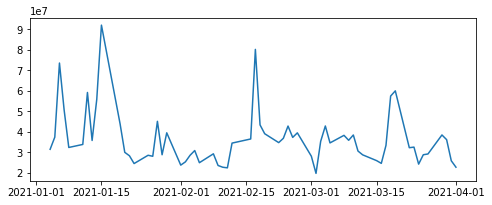

In [22]:
plt.rcParams['figure.figsize'] = [8, 3]
plt.plot(WFC['Volume'])       ############## 표 두개 하나로 합쳐서 보여주는 것도 알아보기

# ▶  Moving Average Line


> 이동평균선

> 증권사 HTS  :  5, 20, 60, 120 일 제공중



In [7]:
 # MA : Moving average

ma5 = XOM_MA['Close'].rolling(window=5).mean()   # 이동평균선 만드는 코드 / Close의 5개의 평균

XOM_MA['MA5'] = ma5        # DataFrame 칼럼에 추가 / insert 메서드 / 추가할 위치['이름'] = 추가할 것

XOM_MA.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2021-03-25,56.500000,54.500000,55.209999,56.180000,31495900.0,56.180000,56.028001
2021-03-26,57.779999,56.520000,57.299999,57.709999,34205300.0,57.709999,56.272000
2021-03-29,57.820000,56.740002,57.340000,57.400002,21144400.0,57.400002,56.570000
2021-03-30,57.360001,56.490002,56.860001,56.689999,20303400.0,56.689999,56.864000
2021-03-31,56.630001,55.799999,56.349998,55.830002,23686500.0,55.830002,56.762000


MA 20, 60, 120 일 추가



In [8]:
ma20 = XOM_MA['Close'].rolling(window=20).mean()
ma60 = XOM_MA['Close'].rolling(window=60).mean()
ma120 = XOM_MA['Close'].rolling(window=120).mean()

XOM_MA['MA20'] = ma20
XOM_MA['MA60'] = ma60
XOM_MA['MA120'] = ma120

XOM_MA.tail(3)

,High,Low,Open,Close,Volume,Adj Close,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2021-03-29,57.820000,56.740002,57.340000,57.400002,21144400.0,57.400002,56.570,58.4505,52.114167,44.877917
2021-03-30,57.360001,56.490002,56.860001,56.689999,20303400.0,56.689999,56.864,58.4815,52.372000,45.072083
2021-03-31,56.630001,55.799999,56.349998,55.830002,23686500.0,55.830002,56.762,58.4470,52.610833,45.258167


**이동평균선 포함하여 차트 그리기.**

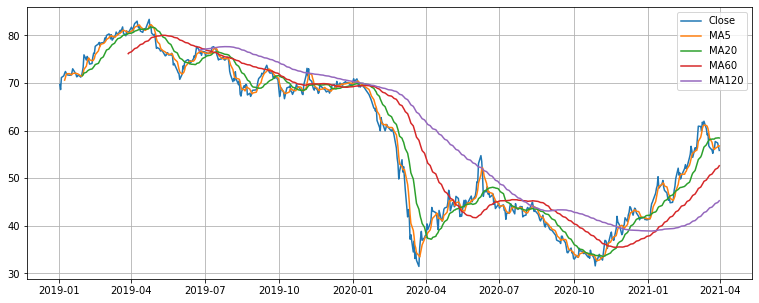

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 5] # [width, height] (inches)   # 그래프 크기 조정

plt.plot(XOM_MA.index, XOM_MA['Close'], label="Close")    # 범례 : label = " " / 이제 여러개라서 헷갈리니까
plt.plot(XOM_MA.index, XOM_MA['MA5'], label="MA5")
plt.plot(XOM_MA.index, XOM_MA['MA20'], label="MA20")
plt.plot(XOM_MA.index, XOM_MA['MA60'], label="MA60")
plt.plot(XOM_MA.index, XOM_MA['MA120'], label="MA120")

plt.legend(loc='best')  # 범례 소환 / best : 적합한 위치
plt.grid()               # 격자 생성
plt.show()
plt.show()
